In [66]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from metric_learn import LMNN
import time

In [67]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

In [68]:
X = breast_cancer_data['data']
y = breast_cancer_data['target']
print("Số chiều của bộ dữ liệu: ", X.shape)

Số chiều của bộ dữ liệu:  (569, 30)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/2)

In [70]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

print("Print results for 10 test data samples in test:")
print("Predicted labels: ", y_pred[:10])
print("Ground truth:     ", y_test[:10])

Print results for 10 test data samples in test:
Predicted labels:  [1 0 1 0 1 1 0 1 0 0]
Ground truth:      [1 0 0 0 1 1 0 1 0 0]


In [71]:
print(f'Using 1 neighbor, accuracy score: {round(100 * metrics.accuracy_score(y_test, y_pred), ndigits=2)}%')
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

Using 1 neighbor, accuracy score: 93.68%
Confusion Matrix:
 [[ 86  11]
 [  7 181]]


In [72]:
error_list = []
optimal_k = 1
optimal_error = 1
for quantity in range(1, 51):
    knn_clf = KNeighborsClassifier(n_neighbors=quantity)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    error_list.append(np.mean(y_test != y_pred))
    if optimal_error > np.mean(y_test != y_pred):
        optimal_error = np.mean(y_test != y_pred)
        optimal_k = quantity

Text(0.5, 0, 'Number of Neighbors used in KNeighborsRegressor')

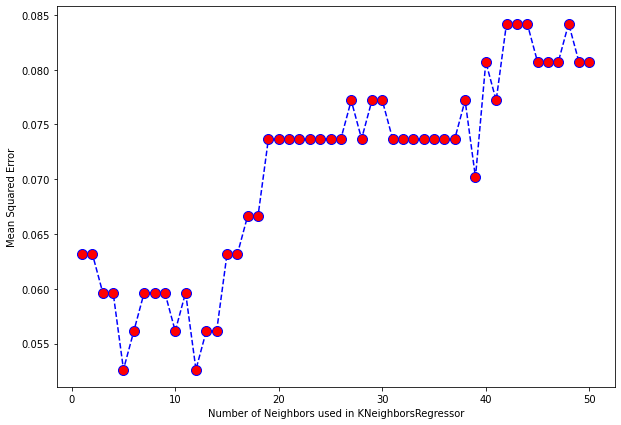

In [73]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 51), error_list, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.ylabel("Mean Squared Error")
plt.xlabel("Number of Neighbors used in KNeighborsRegressor")

In [74]:
knn_clf = KNeighborsClassifier(n_neighbors=optimal_k)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

print("Print results for 10 test data samples in test:")
print("Predicted labels: ", y_pred[:10])
print("Ground truth:     ", y_test[:10])

Print results for 10 test data samples in test:
Predicted labels:  [1 0 1 0 1 1 0 1 0 0]
Ground truth:      [1 0 0 0 1 1 0 1 0 0]


In [75]:
print(f'Using {optimal_k} neighbors, accuracy score: {round(100 * metrics.accuracy_score(y_test, y_pred), ndigits=2)}%')
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

Using 5 neighbors, accuracy score: 94.74%
Confusion Matrix:
 [[ 88   9]
 [  6 182]]


In [76]:

start_time = time.time()
lmnn = LMNN(k=optimal_k, learn_rate=1e-6)
lmnn.fit(X_train, y_train)

LMNN(k=5, learn_rate=1e-06)

In [77]:
knn_clf = KNeighborsClassifier(metric=lmnn.get_metric())
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
end_time = time.time()

print("Print results for 10 test data samples in test:")
print("Predicted labels: ", y_pred[:10])
print("Ground truth:     ", y_test[:10])
print("Running time:", (end_time - start_time))

Print results for 10 test data samples in test:
Predicted labels:  [1 0 0 0 1 1 0 1 0 0]
Ground truth:      [1 0 0 0 1 1 0 1 0 0]
Running time: 13.328141689300537


In [78]:
print(f'Using LMNN with {optimal_k} neighbors, accuracy score: {round(100 * metrics.accuracy_score(y_test, y_pred), ndigits=2)}%')
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

Using LMNN with 5 neighbors, accuracy score: 95.44%
Confusion Matrix:
 [[ 86  11]
 [  2 186]]


In [79]:
from sklearn.pipeline import make_pipeline

In [80]:
start_time = time.time()
knn_clf = make_pipeline(LMNN(k=optimal_k, learn_rate=1e-6), KNeighborsClassifier())
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
end_time = time.time()

print("Print results for 10 test data samples in test:")
print("Predicted labels: ", y_pred[:10])
print("Ground truth:     ", y_test[:10])
print("Running time:", (end_time - start_time))

Print results for 10 test data samples in test:
Predicted labels:  [1 0 0 0 1 1 0 1 0 0]
Ground truth:      [1 0 0 0 1 1 0 1 0 0]
Running time: 9.71248459815979


In [81]:
print(f'Using optimal_k neighbors, accuracy score: {round(100 * metrics.accuracy_score(y_test, y_pred), ndigits=2)}%')
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

Using optimal_k neighbors, accuracy score: 95.44%
Confusion Matrix:
 [[ 86  11]
 [  2 186]]


In [82]:
error_list = []
optimal_k = 1
optimal_error = 1
for quantity in range(1, 15):
    knn_clf = make_pipeline(LMNN(k = quantity), KNeighborsClassifier())
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    error_list.append(np.mean(y_test != y_pred))
    if optimal_error > np.mean(y_test != y_pred):
        optimal_error = np.mean(y_test != y_pred)
        optimal_k = quantity
    

Text(0.5, 0, 'Number of Neighbors used in KNeighborsRegressor')

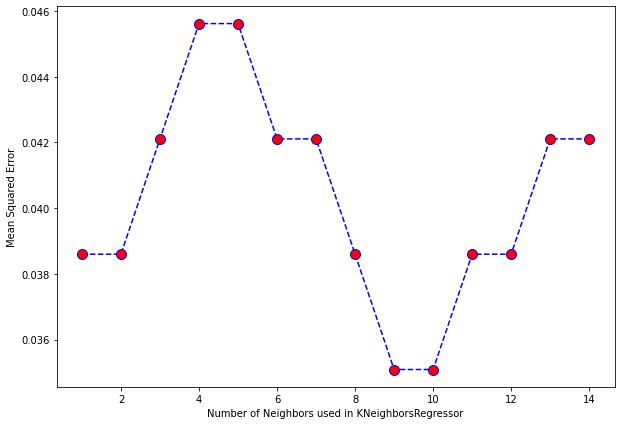

In [83]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 15), error_list, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.ylabel("Mean Squared Error")
plt.xlabel("Number of Neighbors used in KNeighborsRegressor")

In [84]:
start_time = time.time()
knn_clf = make_pipeline(LMNN(k=optimal_k, learn_rate=1e-6), KNeighborsClassifier())
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
end_time = time.time()

print("Print results for 10 test data samples in test:")
print("Predicted labels: ", y_pred[:10])
print("Ground truth:     ", y_test[:10])
print("Running time:", (end_time - start_time))

Print results for 10 test data samples in test:
Predicted labels:  [1 0 0 0 1 1 0 1 0 0]
Ground truth:      [1 0 0 0 1 1 0 1 0 0]
Running time: 13.423003435134888


In [85]:
print(f'Using {optimal_k} neighbors, accuracy score: {round(100 * metrics.accuracy_score(y_test, y_pred), ndigits=2)}%')
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

Using 9 neighbors, accuracy score: 96.49%
Confusion Matrix:
 [[ 91   6]
 [  4 184]]
